# Preexperiment Setup

## Experiment setup

For details about the physical experiment setup see the system_details notebook.

### Quick checklist

Before starting a series of experiments, 

    - the balls need to be cleaned in detergent, water, de-ionised water and dried. Leave on a metal sieve. 
    - The surface needs a light clean with IPA and a cloth but don't rub too hard. 
    - Check the sandblasting still looks fresh.

### Setup filestructure

Use the next set of code to setup your filestructure etc.

In [ ]:
import os
import datetime

project_filepath = 'E:/RawData/Mike/Intruders/Intruder_expts/'
expt_folder = datetime.datetime.now().strftime('%Y_%m_%d')

if not os.path.isdir(project_filepath + expt_folder + '/'):
    os.mkdir(project_filepath + expt_folder + '/')
    print("Setting up new experimental folder : ", project_filepath + expt_folder)


## Define system boundary

Start by defining the boundary of the experiment using this code. Click on each corner of the boundary in the image and then press spacebar. *Only necessary if you'ved moved something*

In [ ]:
from shaker.balance import find_boundary
from labvision.camera import Camera

with Camera() as cam:
    boundary_pts = find_boundary(cam, shape='polygon')

print(boundary_pts)

## Check stepper motor communication is working

The stepper motors can be a bit temperamental. Run the next cell to check that the motors are working. They move very slowly so look carefully. 

The issue is to do with the serial communication. If the motors are not moving, try the following fixes in this order:

    1. Try restarting the kernel
    2. Restart the arduino and the computer. Switch off DC power supply to arduino when restarting
    

In [ ]:
from shaker.stepperXY import StepperXY

with StepperXY() as motors:
    motors.movexy(0, 0)

## Get Motor Limits

Movements in x and y ~ 15000-20000 seem enough to tip the shaker from one side to the other. You may bottom out the motors if not careful so make sure you know which way things are moving. You want one limit above and left and one below and right. You are trying to tell the system the motor limits that create a square box on the surface that it should search in. 


shaker init
stepperxy init
Motor limits from config file [(x1,x2),(y1,y2)] :  [[0, 0], [0, 0]]
x,y coords of centre of mass:  625.463691479119 291.90111625947765
returned values:  625.463691479119 291.90111625947765
(625.463691479119, 291.90111625947765)


array([[[ 96, 106, 108],
        [ 96, 106, 108],
        [ 96, 106, 108],
        ...,
        [ 71,  73,  77],
        [ 72,  74,  78],
        [ 72,  74,  78]],

       [[101, 109, 112],
        [101, 109, 112],
        [101, 109, 112],
        ...,
        [ 69,  71,  75],
        [ 68,  70,  74],
        [ 68,  70,  74]],

       [[ 97, 104, 107],
        [ 97, 104, 107],
        [ 97, 104, 107],
        ...,
        [ 68,  70,  74],
        [ 66,  68,  72],
        [ 65,  67,  71]],

       ...,

       [[113, 120, 123],
        [105, 112, 115],
        [ 95, 102, 105],
        ...,
        [ 93,  92,  96],
        [ 95,  94,  98],
        [ 98,  97, 101]],

       [[106, 113, 116],
        [100, 107, 110],
        [ 93, 100, 103],
        ...,
        [ 89,  88,  92],
        [ 93,  92,  96],
        [ 99,  98, 102]],

       [[ 96, 103, 106],
        [ 94, 101, 104],
        [ 92,  99, 102],
        ...,
        [ 85,  84,  88],
        [ 91,  90,  94],
        [ 99,  98, 102]]

Window already closed
Point requested: (15000,5000) : Discarded
x,y coords of centre of mass:  566.4738822666422 294.1079405831652
returned values:  566.4738822666422 294.1079405831652
(566.4738822666422, 294.1079405831652)


array([[[ 97, 107, 109],
        [ 96, 106, 108],
        [ 96, 106, 108],
        ...,
        [ 67,  69,  73],
        [ 68,  70,  74],
        [ 70,  72,  76]],

       [[ 93, 101, 104],
        [ 93, 101, 104],
        [ 94, 102, 105],
        ...,
        [ 67,  69,  73],
        [ 68,  70,  74],
        [ 71,  73,  77]],

       [[101, 108, 111],
        [101, 108, 111],
        [100, 107, 110],
        ...,
        [ 67,  69,  73],
        [ 69,  71,  75],
        [ 72,  74,  78]],

       ...,

       [[104, 111, 114],
        [101, 108, 111],
        [ 97, 104, 107],
        ...,
        [ 89,  94,  97],
        [ 89,  94,  97],
        [ 92,  97, 100]],

       [[101, 108, 111],
        [ 97, 104, 107],
        [ 93, 100, 103],
        ...,
        [ 84,  89,  92],
        [ 87,  92,  95],
        [ 92,  97, 100]],

       [[ 97, 104, 107],
        [ 93, 100, 103],
        [ 90,  97, 100],
        ...,
        [ 81,  86,  89],
        [ 86,  91,  94],
        [ 92,  97, 100]]

Window already closed
Point requested: (10000,5000) : Accepted for top left
x,y coords of centre of mass:  609.6036786883751 370.3516482681598
returned values:  609.6036786883751 370.3516482681598
(609.6036786883751, 370.3516482681598)


array([[[ 97, 105, 112],
        [ 97, 105, 112],
        [ 97, 105, 112],
        ...,
        [ 71,  73,  77],
        [ 71,  73,  77],
        [ 70,  72,  76]],

       [[106, 113, 120],
        [105, 112, 119],
        [104, 111, 118],
        ...,
        [ 72,  74,  78],
        [ 71,  73,  77],
        [ 71,  73,  77]],

       [[101, 107, 113],
        [101, 107, 113],
        [100, 106, 112],
        ...,
        [ 72,  74,  78],
        [ 72,  74,  78],
        [ 71,  73,  77]],

       ...,

       [[106, 113, 116],
        [104, 111, 114],
        [100, 107, 110],
        ...,
        [ 95, 100, 103],
        [ 94,  99, 102],
        [ 94,  99, 102]],

       [[103, 110, 113],
        [101, 108, 111],
        [ 98, 105, 108],
        ...,
        [ 92,  97, 100],
        [ 92,  97, 100],
        [ 93,  98, 101]],

       [[ 98, 105, 108],
        [ 98, 105, 108],
        [ 95, 102, 105],
        ...,
        [ 90,  95,  98],
        [ 90,  95,  98],
        [ 93,  98, 101]]

Window already closed
Point requested: (20000,-5000) : Discarded
x,y coords of centre of mass:  718.6784379643109 333.78605303837554
returned values:  718.6784379643109 333.78605303837554
(718.6784379643109, 333.78605303837554)


array([[[100, 107, 110],
        [100, 107, 110],
        [ 99, 106, 109],
        ...,
        [ 67,  69,  73],
        [ 67,  69,  73],
        [ 66,  68,  72]],

       [[ 92,  99, 102],
        [ 92,  99, 102],
        [ 93, 100, 103],
        ...,
        [ 68,  70,  74],
        [ 67,  69,  73],
        [ 67,  69,  73]],

       [[ 99, 106, 109],
        [ 99, 106, 109],
        [ 99, 106, 109],
        ...,
        [ 68,  70,  74],
        [ 68,  70,  74],
        [ 67,  69,  73]],

       ...,

       [[104, 111, 114],
        [101, 108, 111],
        [ 97, 104, 107],
        ...,
        [ 91,  96,  99],
        [ 90,  95,  98],
        [ 91,  96,  99]],

       [[101, 108, 111],
        [ 97, 104, 107],
        [ 93, 100, 103],
        ...,
        [ 87,  92,  95],
        [ 89,  94,  97],
        [ 91,  96,  99]],

       [[ 97, 104, 107],
        [ 93, 100, 103],
        [ 90,  97, 100],
        ...,
        [ 85,  90,  93],
        [ 87,  92,  95],
        [ 90,  95,  98]]

Window already closed
Point requested: (30000,-10000) : Discarded
x,y coords of centre of mass:  722.8979811394951 433.4919905920062
returned values:  722.8979811394951 433.4919905920062
(722.8979811394951, 433.4919905920062)


array([[[ 98, 105, 108],
        [ 98, 105, 108],
        [ 98, 105, 108],
        ...,
        [ 73,  75,  79],
        [ 74,  76,  80],
        [ 74,  76,  80]],

       [[100, 107, 110],
        [100, 107, 110],
        [100, 107, 110],
        ...,
        [ 71,  73,  77],
        [ 70,  72,  76],
        [ 70,  72,  76]],

       [[102, 109, 112],
        [102, 109, 112],
        [102, 109, 112],
        ...,
        [ 70,  72,  76],
        [ 68,  70,  74],
        [ 67,  69,  73]],

       ...,

       [[108, 115, 118],
        [105, 112, 115],
        [101, 108, 111],
        ...,
        [100,  99, 103],
        [ 99,  98, 102],
        [100,  99, 103]],

       [[105, 112, 115],
        [101, 108, 111],
        [ 97, 104, 107],
        ...,
        [ 96,  95,  99],
        [ 98,  97, 101],
        [100,  99, 103]],

       [[101, 108, 111],
        [ 97, 104, 107],
        [ 94, 101, 104],
        ...,
        [ 94,  93,  97],
        [ 96,  95,  99],
        [ 99,  98, 102]]

Window already closed
Point requested: (30000,-20000) : Accepted for bottom right
Motor limits set interactively [(x1,x2),(y1,y2)] :  [(10000, 30000), (-20000, 5000)]
port closed
port closed
Shaker communication closed


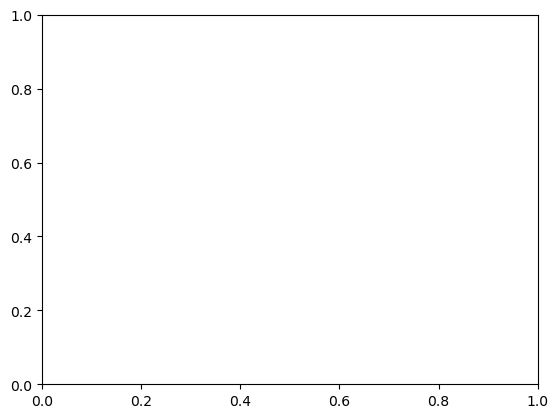

In [1]:
## Set motor limits
from shaker.balance import Balancer
from shaker.stepperXY import StepperXY
from shaker.shaker import Shaker
from shaker.levelling import measure_com
from labvision.camera import Camera
from labvision.camera.camera_config import CameraType


panasonic = CameraType.PANASONICHCX1000 #creating camera object.
cam =  Camera(cam_type=panasonic)

with Shaker() as shaker, StepperXY() as motors:
    bal=Balancer(shaker, cam, motors, measure_fn=measure_com)
    bal.set_boundary(set_boundary_pts=False)
    motor_limits = bal.set_motor_limits(set_limits=True)

## Leaving the system to get on with it

*General Warning*

The magnet that drives the shaker has a warming up period. Run the shaker at a dutycycle of 500 with the water cooler on for 90 mins before starting experiments. If you skip this step your accelerations won't be correctly calibrated to the duty_cycles.

Before running the automated setup it is worth doing checks. Are all bits talking to the computer correctly! Switch on the water bath etc and start the shaker running then set the delay_timer at the top, hit run and leave it to get on with it. Check the shaker's toggle switch  is on. Don't forget to press the relay button on the back of the power supply. My personal favourite mistake!

1. The system will wait for delay_timer_hours with the shaker duty_cycle at 0
2. The system will then warm up for 2 hours at a duty_cycle of 500
3. The system will level itself (probably take a long time!)
4. The system will collect an acceleration calibration curve
5. You can come in and start work (hopefully ;-)

Hopefully timings should be consistent.

In [ ]:
#Quick variables
delay_timer_hours = 0

In [ ]:
# Delays the setup by x hours then warms for 2 hours
import time
from shaker.shaker import Shaker

def start_expt_setup(delay_timer_hours):
    for i in range(delay_timer_hours):
        print('Starting expt setup in ' + str(delay_timer_hours - i) + ' hours')
        time.sleep(3600)

sh = Shaker()
sh.set_duty(0)
start_expt_setup(delay_timer_hours)
sh.set_duty(500)
start_expt_setup(1)
sh.quit()

## Levelling the shaker

When levelling system use the same balls being used for the experiments. The balls need to be cleaned in detergent, water, de-ionised water and dried. The levelling uses the 4k Video Capture card to take pictures of the tray. These images are processed using a function that works out where the centre of mass of all the particles in the tray is. At the start the user defines where the centre is by clicking the corners of the boundary. The system then moves the motors systematically to try and minimise the distance between the true centre of tray and centre of mass of particles.

The state of the motors is stored in a file on the drive at MikeSmithLabSharedFolder:\shaker_config\motor_positions.txt
The code assumes that MikeSmithLabSharedFolder is mounted as the Z:
You can alter this in the shaker/settings.py

If you encounter errors in serial connections / can't find cameras etc

1. Check everythiing is plugged in and powered on.

2. Restart the computer as Windows assigns the serial ports at startup.

Fill system with particles about the number shown below:

<div> <img src="imgs/level_starting.jpg" alt="Drawing" style="width: 500px;"/></div>

The system then begins the process of levelling. You can check the system is improving the level by looking at the plot of the minimization function and the tracked centre in the image. The levelling process is slow and depending on how far out it is, it will take hours and is best done by leaving the system overnight once it is warmed up.

It measures the level by using an image processing function to identify centre of mass of particles. It then moves the motors to try and minimise the distance between the centre of mass and the centre of the tray. It uses a minimization routine called gp_minimize from scikit-optimize. 

initial_iterations is the number of measurements per position to determine the centre of mass
ncalls is how many steps it will take to level the system.

In [ ]:
#%matplotlib widget
from shaker.levelling import balance_shaker

#passing boundary_pts=None will allow the user to manually select the boundary points
boundary_pts = None
balance_shaker(initial_iterations=10, ncalls=100, boundary_pts=boundary_pts)

### Calibrating the system and accelerometer

Run a script to collect duty cycles and corresponding measured peak accelerations from the RPI-LCD (i.e $\Gamma = a\omega^{2}/g$). The output file will be used in particle tracker to convert the duty cycle to the corresponding acceleration. The code on the RPI-LCD is in the <a href="https://github.com/mikesmithlab/Accelerometer">Accelerometer</a> repository. <a href="https://github.com/MikeSmithLabTeam/labequipment/blob/master/labequipment/accelerometer.py">Labequipment</a> has python code to interface with and read results.

In [ ]:
from shaker.calibrate_accelerometer import calibrate_accelerometer
import pandas as pd

duty_cycles, acceleration = calibrate_accelerometer(start=300, stop=900, step=100)
pd.DataFrame({'duty_cycle': duty_cycles, 'acceleration': acceleration}).to_csv('acceleration_calibration_curve.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('acceleration_calibration_curve.csv')
plt.plot(df['duty_cycle'], df['acceleration'],'r-')
plt.xlabel('Duty Cycle')
plt.ylabel('Acceleration')
plt.title('Calibration Curve')

Already have duty_cycle postprocessing function in particletracker.
Need to add postprocessing function that adds calibrated accelerations to df in particletracker.